# Faster RCNN test

In [1]:
from PIL import Image
from PIL import ImageDraw
import json
from utils import analyze_scene
import matplotlib.pyplot as plt

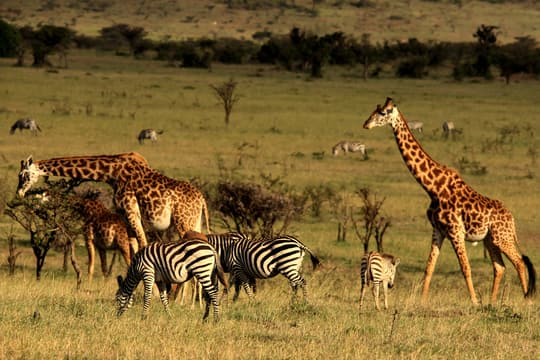

In [2]:
im = Image.open('savanna.jpg')
im

In [3]:
filename = 'savanna.jpg'
import base64
import json

image = open(filename, 'rb')  # open binary file in read mode
image_read = image.read()
image_64_encode = base64.b64encode(image_read)
bytes_array = image_64_encode.decode('utf-8')
request = {
  "instances": [
    {
      "data": bytes_array
    }
  ]
}
result_file = "{filename}.{ext}".format(filename=str(filename).split(".")[0], ext="json")
print("Result File: ",result_file)
with open(result_file, 'w') as outfile:
    json.dump(request, outfile, indent=4, sort_keys=True)




Result File:  savanna.json


In [4]:
import requests
from time import time
headers = {
    # "Host": "torchserve.default.example.com"
    'Host':'torchserve-custom-gpu.default.example.com'
}

data = open(result_file)
t0 = time()
response = requests.post('http://localhost:8080/v1/models/fasterrcnn:predict', headers=headers, data=data)
print((time()-t0))

20.536563396453857


In [5]:

resp = json.loads(response.content)

In [12]:
resp

{'predictions': [[{'giraffe': [359.731689453125,
     97.65813446044922,
     536.5244750976562,
     311.04913330078125],
    'score': 0.9995884299278259},
   {'zebra': [113.27781677246094,
     239.06787109375,
     224.42022705078125,
     323.0707702636719],
    'score': 0.9983111619949341},
   {'zebra': [358.23370361328125,
     249.82827758789062,
     401.18804931640625,
     312.4217224121094],
    'score': 0.9964311122894287},
   {'giraffe': [12.228442192077637,
     148.805419921875,
     223.30368041992188,
     274.1198425292969],
    'score': 0.9953711628913879},
   {'zebra': [192.13323974609375,
     230.8203887939453,
     315.92877197265625,
     303.68017578125],
    'score': 0.9949377775192261},
   {'zebra': [331.4194030761719,
     140.47915649414062,
     367.1122741699219,
     159.8126678466797],
    'score': 0.9568306803703308},
   {'giraffe': [86.08132934570312,
     214.31674194335938,
     131.9178009033203,
     279.42901611328125],
    'score': 0.89142119884

In [7]:
draw = ImageDraw.Draw(im)

In [8]:
for pred in resp['predictions'][0]:
    assert len(list(pred.keys())) == 2
    cl_name = list(pred.keys())[0]
    bboxes = pred[cl_name]
    # print(cl_names)
    # print(bboxes)
    # print("score: ",pred['score'])
    if pred['score'] > 0.4:
        draw.rectangle([bboxes[0],bboxes[1],bboxes[2],bboxes[3]],outline=(255,0,0),fill=None,width=2)

Number of Objects:  9
Generating Description of Image...
In the given image, there are three giraffes and six zebras. The first giraffe is positioned towards the left side of the image in the middle of top to bottom. The second giraffe is located towards the bottom right corner of the image, and the third one is placed towards the center right side of the image. Among the six zebras, the first one is located on the left-middle portion of the image, and the third zebra is in between the first and the last zebra. The last three zebras are located towards the right side of the image, with the fourth zebra being in the middle and the fifth and sixth positioned just right to it.


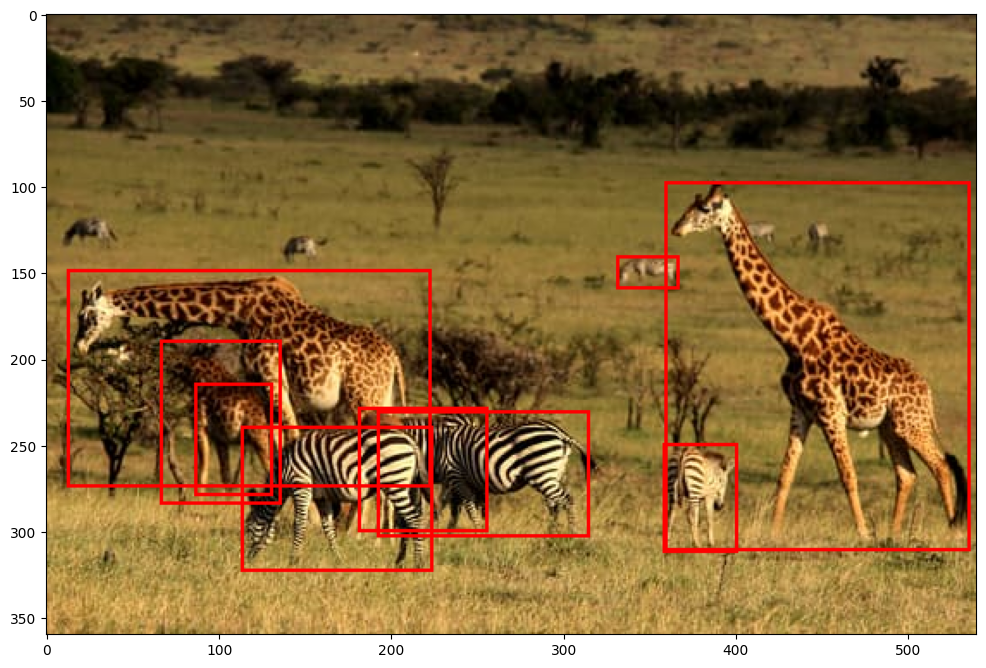

In [9]:
plt.figure(figsize=(12,12))
plt.imshow(im)
print("Number of Objects: ", len(resp['predictions'][0]))
print("Generating Description of Image...")
completion = analyze_scene(resp['predictions'][0])
print(completion.choices[0].message.content)

In [10]:
# resp

In [11]:

# prompt

In [ ]:
# import os

In [ ]:
# os.environ.keys()